In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Импортируем датасет, поулченный ранее

In [74]:
df_tracks = pd.read_csv('tracks_spotify.csv')
df_tracks.head()

,Unnamed: 0,name,duration,explicit,track number,countries,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Born With A Beer In My Hand,188523,False,1,183,77,0.531,0.810,0.0,-5.475,1.0,0.0401,0.05020,0.000039,0.3570,0.608,148.026
1,1,Last Night,163854,True,2,183,89,0.492,0.675,6.0,-5.456,1.0,0.0389,0.46700,0.000000,0.1420,0.478,203.759
2,2,Everything I Love,187047,False,3,183,80,0.568,0.841,8.0,-3.802,1.0,0.0261,0.00514,0.000503,0.1470,0.668,103.983
3,3,Man Made A Bar (feat. Eric Church),191231,False,4,183,81,0.498,0.764,4.0,-5.006,1.0,0.0309,0.12300,0.000031,0.1190,0.489,147.984
4,4,Devil Don’t Know,205182,False,5,183,77,0.530,0.664,0.0,-5.648,1.0,0.0272,0.37700,0.000038,0.0937,0.323,125.002


Категориальных переменных в датасете нет, это хорошо, но часть признаков перед EDA предобработаем

In [75]:
df_tracks['explicit'] = (df_tracks['explicit'] == True)*1 #переводим в бинарную переменную

In [76]:
df_tracks.drop('Unnamed: 0', axis = 1, inplace = True) #избавляемся от индексов

In [77]:
df_tracks['duration'] = df_tracks['duration']//1000 #переводим миллисекунды в секунды

В тетради Parser мы проверили, есть ли пропуски в таблице, поэтому на этом этапе она уже очищена от пустот.

Popularity - целевая переменная, которую мы будем потом пытаться предсказать, так что логично смотреть на визуализации с ней в первую очередь.

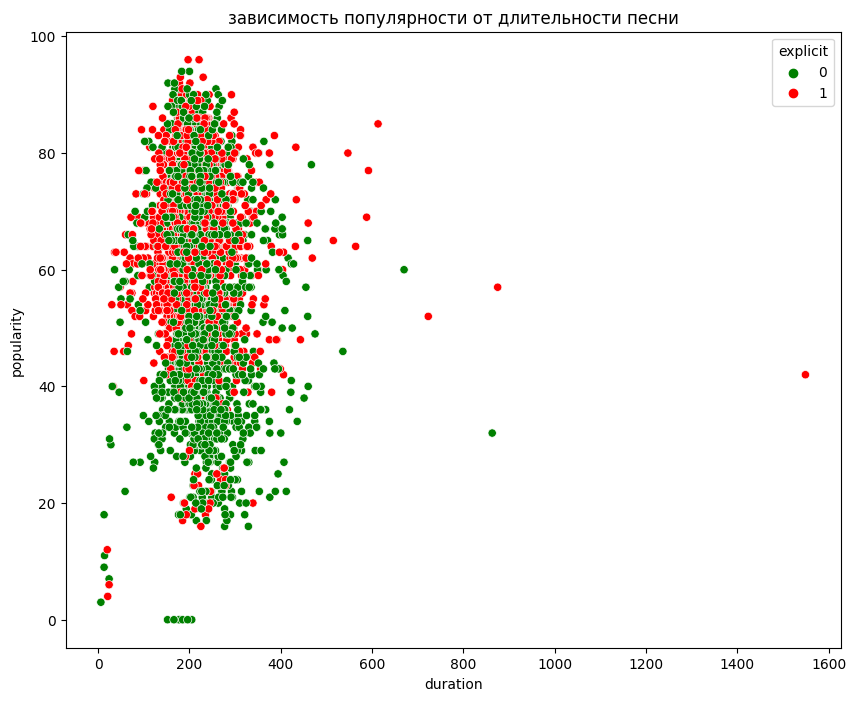

In [92]:
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = df_tracks,
    x = 'duration',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.title('зависимость популярности от длительности песни');

Как видно из графика, есть выбросы, но так как в основном песни длятся 2-4 минуты, то проследить связь на данном графике проблематично

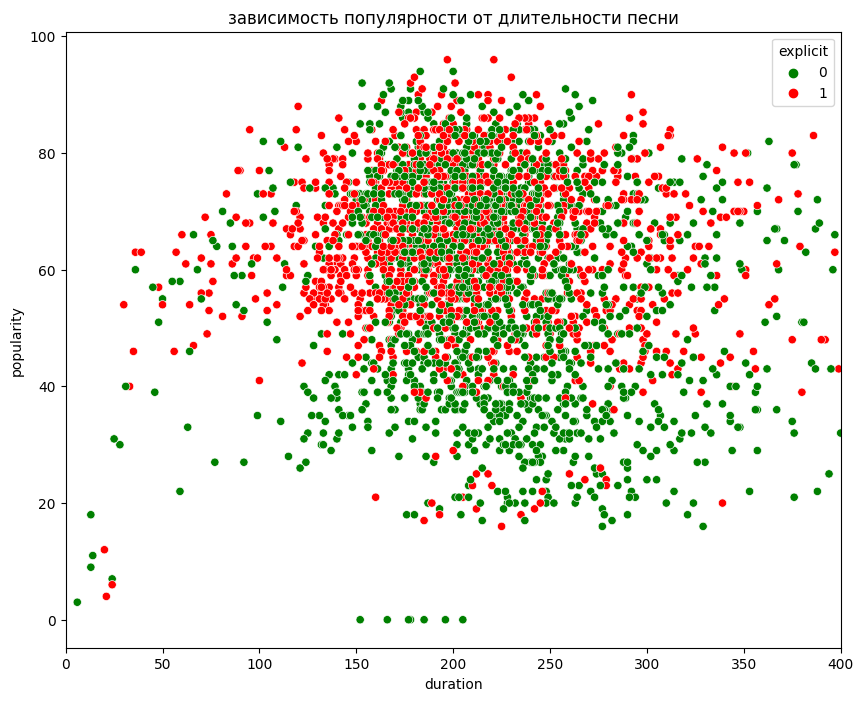

In [91]:
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = df_tracks,
    x = 'duration',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)
plt.xlim(0,400)
plt.title('зависимость популярности от длительности песни');

Если же смотреть рассеивание песен, длительностью до 7 минут, то можно удотовериться, что связи между длительностью песни и ее популярностью нет. В то же время можно заметить, что с ростом популярности, растет и количество explicit песен (эту гипотезу мы проверим).

Text(0.5, 1.0, 'зависимость популярности песни от номера трека в альбоме')

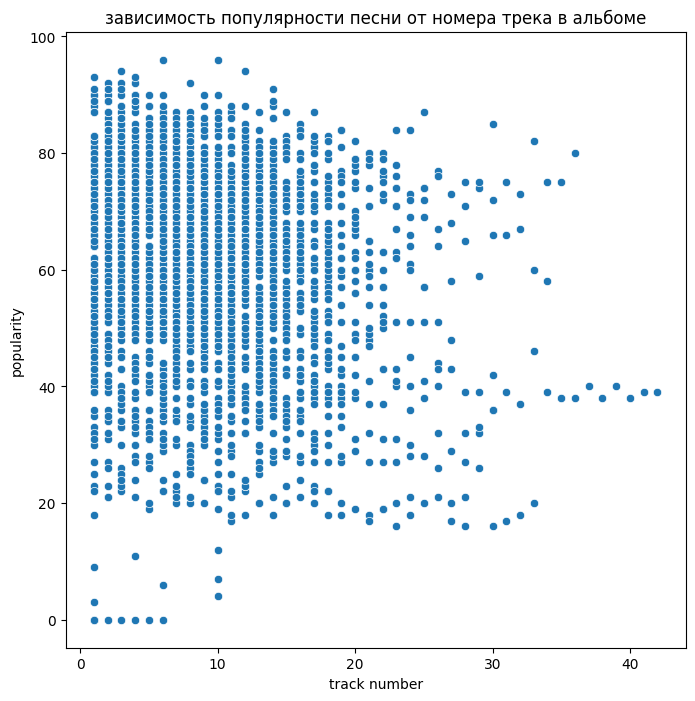

In [90]:
plt.figure(figsize = (8,8))
sns.scatterplot(
    data = df_tracks,
    x = 'track number',
    y = 'popularity'
);
plt.title('зависимость популярности песни от номера трека в альбоме')

Видно, что популярность трека в среднем убывает тем сильнее, чем дальше он находится в альбоме.

In [93]:
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = df_tracks,
    x = 'instrumentalness',
    y = 'popularity',
    hue = 'mode',
    palette = ['green','red']
)
plt.ylim(40,100)
plt.xlim(0.0, 0.2)
plt.title('зависимость Popularity от instrumentalness');

ValueError: ignored

<Figure size 1000x800 with 0 Axes>

Из диаграммы видно, что подавляющее большинство песен не являются инструментальными, а выделить зависимость в данных по данному признаку невозможно. Поэтому данный признак можно не учитывать, так как он незначителен.

In [83]:
df_tracks.drop('instrumentalness', axis = 1, inplace = True)

<Axes: xlabel='valence', ylabel='danceability'>

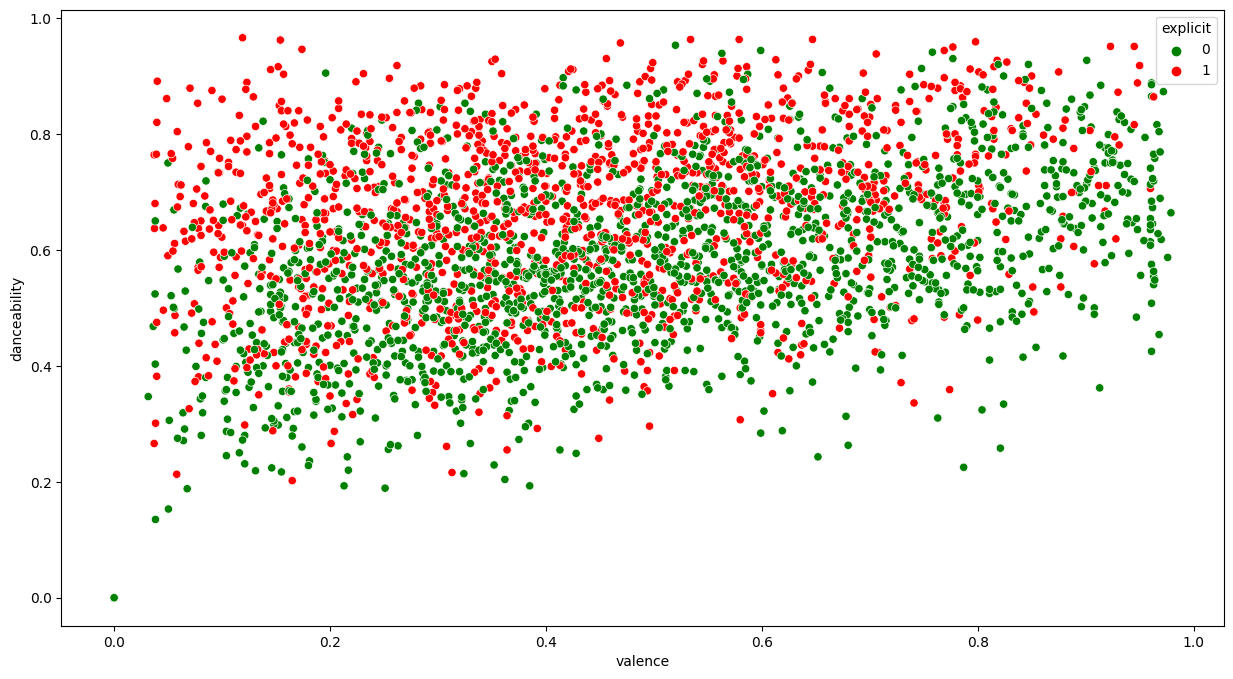

In [56]:
plt.figure(figsize = (15,8))
sns.scatterplot(
    data = df_tracks,
    x = 'valence',
    y = 'danceability',
    hue = 'explicit',
    palette = ['green','red']
)

Как можно заметить, есть определенная зависимость между Danceability и Valence. Объединю данные признаки в один (перемножу их). 

In [84]:
df_tracks['dance-valence'] = df_tracks['danceability']*df_tracks['valence']

,name,duration,explicit,track number,countries,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,dance-valence
0,Born With A Beer In My Hand,188,0,1,183,77,0.531,0.810,0.0,-5.475,1.0,0.0401,0.05020,0.3570,0.608,148.026,0.322848
1,Last Night,163,1,2,183,89,0.492,0.675,6.0,-5.456,1.0,0.0389,0.46700,0.1420,0.478,203.759,0.235176
2,Everything I Love,187,0,3,183,80,0.568,0.841,8.0,-3.802,1.0,0.0261,0.00514,0.1470,0.668,103.983,0.379424
3,Man Made A Bar (feat. Eric Church),191,0,4,183,81,0.498,0.764,4.0,-5.006,1.0,0.0309,0.12300,0.1190,0.489,147.984,0.243522
4,Devil Don’t Know,205,0,5,183,77,0.530,0.664,0.0,-5.648,1.0,0.0272,0.37700,0.0937,0.323,125.002,0.171190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,Unbroken,241,0,8,184,27,0.595,0.792,1.0,-6.979,0.0,0.0286,0.08650,0.0769,0.536,119.800,0.318920
3199,Where The Green Grass Grows,201,0,9,184,50,0.479,0.698,7.0,-7.914,1.0,0.0277,0.19800,0.1260,0.673,159.699,0.322367
3200,Not A Moment Too Soon,227,0,10,184,22,0.707,0.363,7.0,-14.798,1.0,0.0288,0.03850,0.2300,0.621,120.626,0.439047
3201,Indian Outlaw - Dance Mix,260,0,11,184,32,0.698,0.885,4.0,-6.593,1.0,0.0484,0.00110,0.3120,0.781,110.179,0.545138


<Axes: xlabel='valence', ylabel='popularity'>

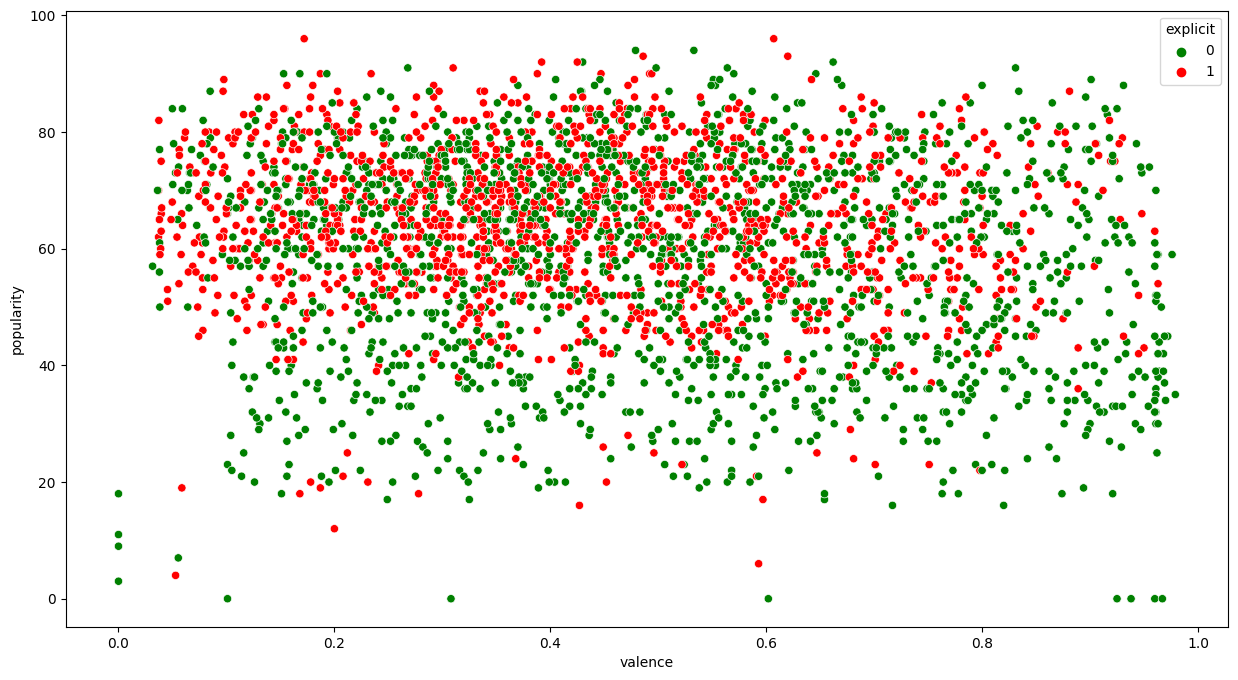

In [87]:
plt.figure(figsize = (15,8))
sns.scatterplot(
    data = df_tracks,
    x = 'valence',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)


In [94]:
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = df_tracks,
    x = 'countries',
    y = 'popularity',
    hue = 'explicit',
    palette = ['green','red']
)

ValueError: ignored

<Figure size 1000x800 with 0 Axes>

Зависимость популярности от страны не значима, так что избавлюсь от нее.

In [88]:
df_tracks.drop('countries', axis = 1, inplace = True)

Пока что это все, что есть. Мы так же хотим получить дату выпусков альбомов, чтобы проверить гипотезу о влиянии кол-ва, прошедших со дня выпуска до дня сбора данных, на популярность песни.
Касательно машинного обучения - мы планируем построить линейную регрессию, которая будет предстказывать популярность трека.